In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from copy import deepcopy

In [2]:
df = pd.read_csv('../data/train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.shape

(550068, 12)

In [4]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [5]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [6]:
df[['Product_Category_2', 'Product_Category_3']] = df[['Product_Category_2', 'Product_Category_3']].fillna(-1).astype(int)

In [7]:
df.duplicated().sum()

0

In [8]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

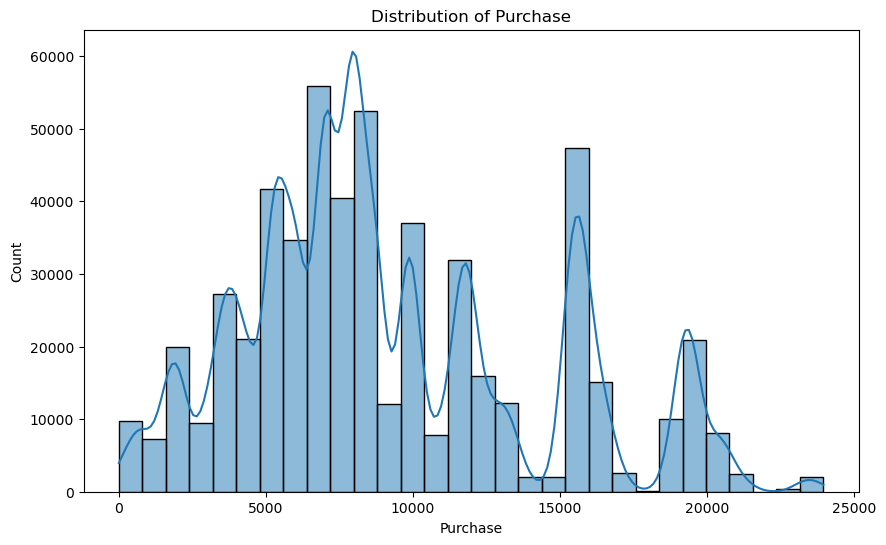

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Purchase'], bins=30, kde=True)
plt.title('Distribution of Purchase')
plt.show()

In [10]:
users=pd.DataFrame()
users['Gender'] = df.groupby('User_ID').agg({'Gender': 'first'})
users['Age'] = df.groupby('User_ID').agg({'Age': 'first'})
users['Occupation'] = df.groupby('User_ID').agg({'Occupation': 'first'})
users['City_Category'] = df.groupby('User_ID').agg({'City_Category': 'first'})
users['Stay_In_Current_City_Years'] = df.groupby('User_ID').agg({'Stay_In_Current_City_Years': 'first'})
users['Marital_Status'] = df.groupby('User_ID').agg({'Marital_Status': 'first'})
users['Number of Purchases'] = df.groupby('User_ID').size()
users['Sum spent'] = df.groupby('User_ID')['Purchase'].sum()
users['Average Purchase'] = df.groupby('User_ID')['Purchase'].mean()
users=users.sort_values(by='Sum spent', ascending=False)
users

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Number of Purchases,Sum spent,Average Purchase
User_ID,,,,,,,,,
1004277,M,36-45,16,A,0,0,979,10536909,10762.930541
1001680,M,26-35,20,A,3,1,1026,8699596,8479.138402
1002909,M,26-35,7,A,1,0,718,7577756,10553.977716
1001941,M,36-45,17,A,1,0,898,6817493,7591.863029
1000424,M,26-35,17,A,3,0,694,6573609,9472.059078
...,...,...,...,...,...,...,...,...,...
1004991,F,55+,14,C,3,1,7,52371,7481.571429
1005117,F,26-35,0,B,0,0,9,49668,5518.666667
1003883,M,51-55,16,C,2,1,9,49349,5483.222222


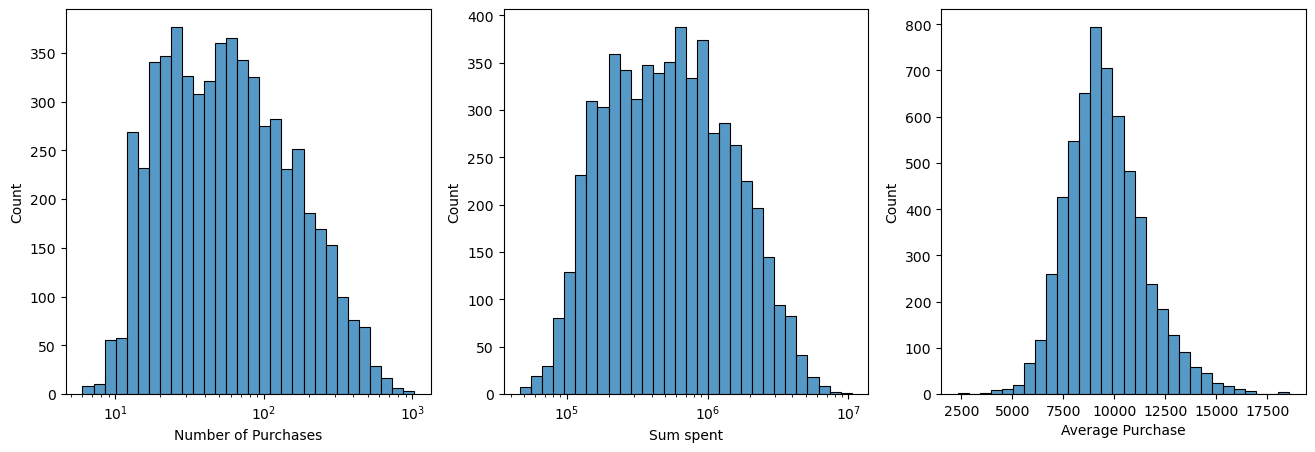

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(16,5))
sns.histplot(x=users['Number of Purchases'], bins=30, ax=axs[0], log_scale=True)#, hue=users['Age'], multiple='stack')
sns.histplot(x=users['Sum spent'], bins=30, ax=axs[1], log_scale=True)#, hue=users['Age'], multiple='stack')
sns.histplot(x=users['Average Purchase'], bins=30, ax=axs[2])#, hue=users['Age'], multiple='stack')
plt.show()

In [12]:
prods=pd.DataFrame()
prods['Product_Category_1'] = df.groupby('Product_ID').agg({'Product_Category_1': 'first'})
prods['Number of Purchases'] = df.groupby('Product_ID').size()
prods['Sum spent'] = df.groupby('Product_ID')['Purchase'].sum()
prods['Unitary Price'] = prods['Sum spent'] / prods['Number of Purchases']
prods=prods.sort_values(by='Sum spent', ascending=False)
prods

,Product_Category_1,Number of Purchases,Sum spent,Unitary Price
Product_ID,,,,
P00025442,1,1615,27995166,17334.468111
P00110742,1,1612,26722309,16577.114764
P00255842,16,1383,25168963,18198.816341
P00059442,6,1406,24338343,17310.343528
P00184942,1,1440,24334887,16899.227083
...,...,...,...,...
P00012942,5,1,1717,1717.000000
P00325342,11,1,1656,1656.000000
P00353042,11,1,1545,1545.000000


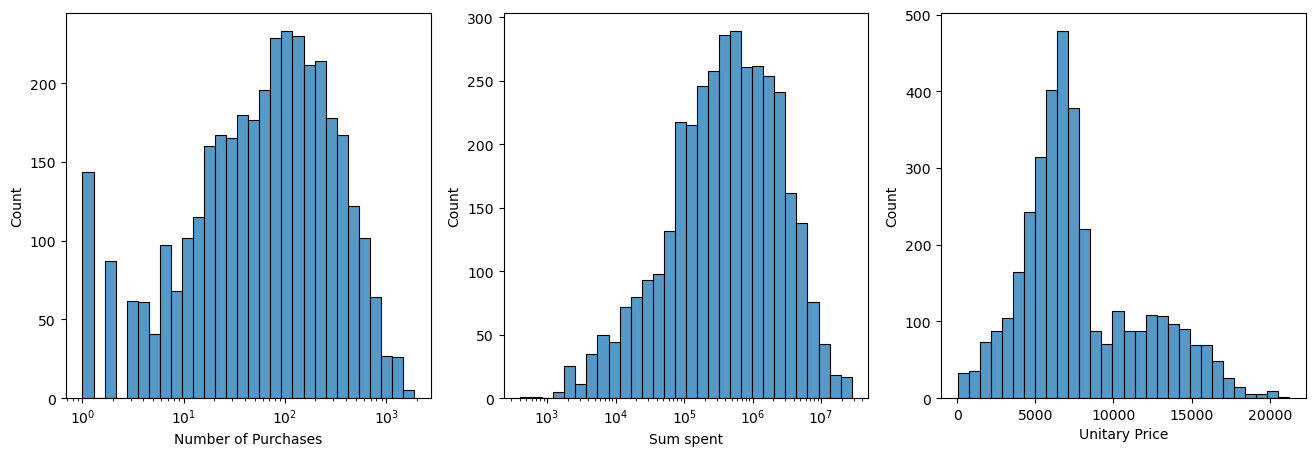

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(16,5))
sns.histplot(x=prods['Number of Purchases'], bins=30, ax=axs[0], log_scale=True)#, hue=prods['Product_Category_1'], multiple='stack')
sns.histplot(x=prods['Sum spent'], bins=30, ax=axs[1], log_scale=True)#, hue=prods['Product_Category_1'], multiple='stack')
sns.histplot(x=prods['Unitary Price'], bins=30, ax=axs[2])#, hue=prods['Product_Category_1'], multiple='stack')
plt.show()

In [14]:
prods_cat=pd.DataFrame()
prods_cat['Number of Purchases'] = df.groupby('Product_Category_1').size()
prods_cat['Sum spent'] = df.groupby('Product_Category_1')['Purchase'].sum()
prods_cat['Average Price'] = prods_cat['Sum spent'] / prods_cat['Number of Purchases']
prods_cat=prods_cat.sort_values(by='Sum spent', ascending=False)
prods_cat

,Number of Purchases,Sum spent,Average Price
Product_Category_1,,,
1,140378,1910013754,13606.218596
5,150933,941835229,6240.088178
8,113925,854318799,7498.958078
6,20466,324150302,15838.478550
2,23864,268516186,11251.935384
3,20213,204084713,10096.705734
16,9828,145120612,14766.037037
11,24287,113791115,4685.268456
10,5125,100837301,19675.570927


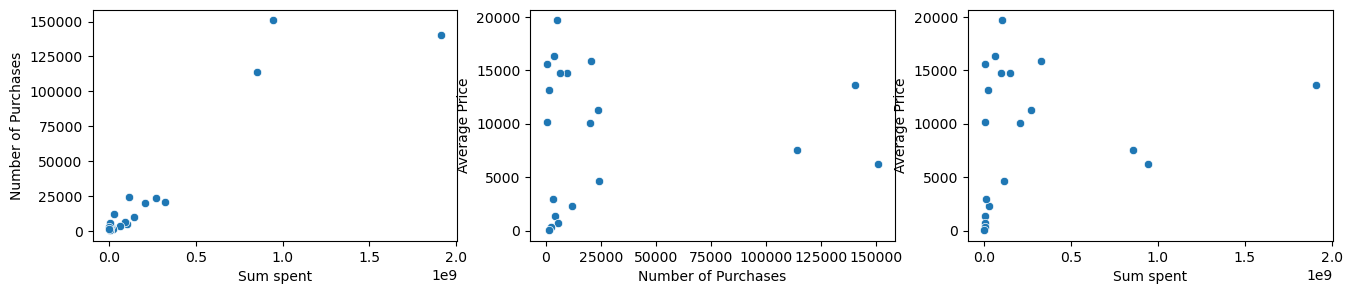

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(16,3))
sns.scatterplot(x='Sum spent', y='Number of Purchases', data=prods_cat, ax=axs[0])
sns.scatterplot(x='Number of Purchases', y='Average Price', data=prods_cat, ax=axs[1])
sns.scatterplot(x='Sum spent', y='Average Price', data=prods_cat, ax=axs[2])
plt.show()

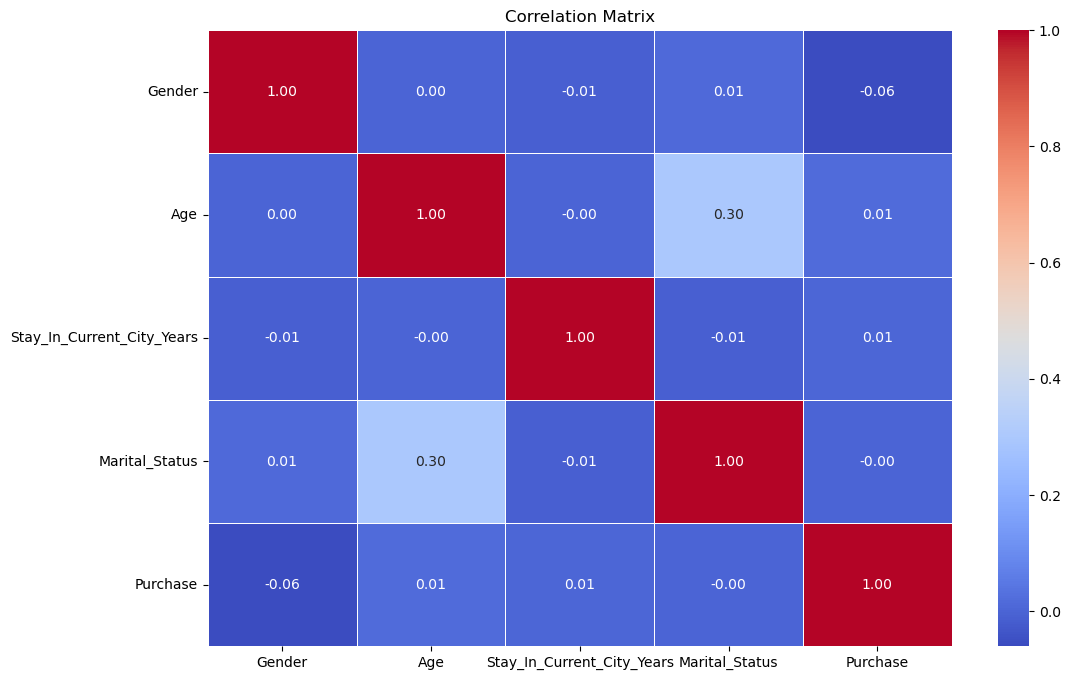

In [16]:
df_numerical = deepcopy(df)
df_numerical = df_numerical[['Gender', 'Age', 'Stay_In_Current_City_Years', 'Marital_Status', 'Purchase']]

df_numerical['Gender'] = [0 if x=='M' else 1 for x in df_numerical['Gender']]
df_numerical['Age'] = ['55-95' if x=='55+' else x for x in df_numerical['Age']]
df_numerical['Age'] = [np.mean([int(x.split('-')[0]), int(x.split('-')[-1])])for x in df_numerical['Age']]
df_numerical['Stay_In_Current_City_Years'] = [int(x[:-1]) if x=='4+' else int(x) for x in df_numerical['Stay_In_Current_City_Years']]

correlation_matrix = df_numerical.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

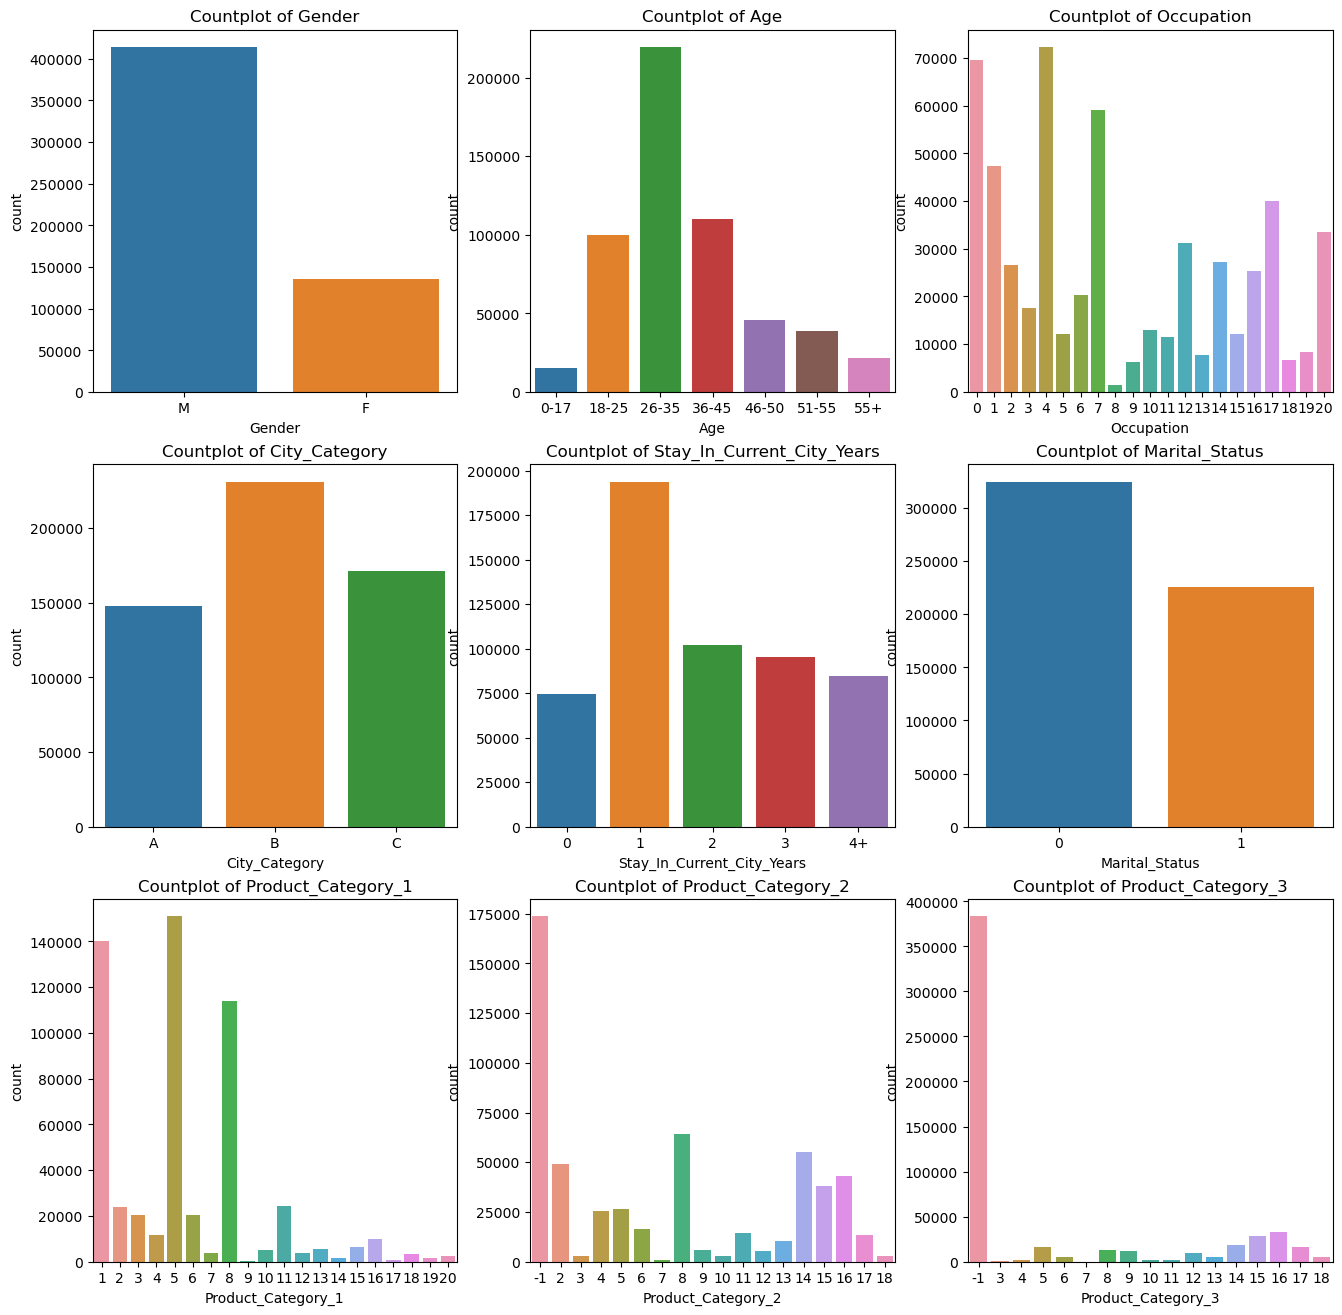

In [17]:
orders = [['M', 'F'],
          ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'],
          range(21),
          ['A', 'B', 'C'],
          ['0', '1', '2', '3', '4+'],
          [0, 1],
          range(1, 21),
          [-1] + list(range(2, 19)),
          [-1] + list(range(3, 19))]

fig, axs = plt.subplots(3, 3, figsize=(16,16))
for i, col in enumerate(['Gender', 'Age', 'Occupation',
            'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status',
            'Product_Category_1', 'Product_Category_2', 'Product_Category_3']):
    ax = axs[i//3, i%3]
    sns.countplot(x=col, data=df, ax=ax, order=orders[i])
    ax.title.set_text(f'Countplot of {col}')
plt.show()

In [23]:
user_groups=pd.DataFrame()
grouping_cols = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']
user_groups['Numerosity'] = users.groupby(grouping_cols).size()
user_groups['Sum spent'] = users.groupby(grouping_cols)['Sum spent'].sum()
user_groups['Average Purchase'] = users.groupby(grouping_cols)['Average Purchase'].mean()
user_groups=user_groups.sort_values(by='Sum spent', ascending=False)
user_groups

Numerosity  \
Gender Age   Occupation City_Category Stay_In_Current_City_Years Marital_Status               
M      18-25 4          B             1                          0                       30   
                                      4+                         0                       22   
       26-35 7          A             1                          0                       15   
             0          B             1                          0                       14   
       18-25 4          B             2                          0                       16   
...                                                                                     ...   
F      51-55 16         C             2                          0                        1   
       46-50 2          C             2                          0                        1   
M      18-25 2          B             2                          1                        1   
F      18-25 10         C             4+                         0                        1   
       55+   14         C             3                          1                        1   

                                                                                 Sum spent  \
Gender Age   Occupation City_Category Stay_In_Current_City_Years Marital_Status              
M      18-25 4          B             1                          0                35068606   
                                      4+                         0                29542132   
       26-35 7          A             1                          0                25726307   
             0          B             1                          0                23745027   
       18-25 4          B             2                          0                21728229   
...                                                                                    ...   
F      51-55 16         C             2                          0                   62753   
       46-50 2          C             2                          0                   62250   
M      18-25 2          B             2                          1                   57805   
F      18-25 10         C             4+                         0                   53996   
       55+   14         C             3                          1                   52371   

                                                                                 Average Purchase  
Gender Age   Occupation City_Category Stay_In_Current_City_Years Marital_Status                    
M      18-25 4          B             1                          0                    9841.928683  
                                      4+                         0                   10269.017361  
       26-35 7          A             1                          0                    9840.836473  
             0          B             1                          0                   10313.643574  
       18-25 4          B             2                          0                   10646.275210  
...                                                                                           ...  
F      51-55 16         C             2                          0                    6972.555556  
       46-50 2          C             2                          0                    7781.250000  
M      18-25 2          B             2                          1                    3612.812500  
F      18-25 10         C             4+                         0                    3599.733333  
       55+   14         C             3                          1                    7481.571429  

[2430 rows x 3 columns]

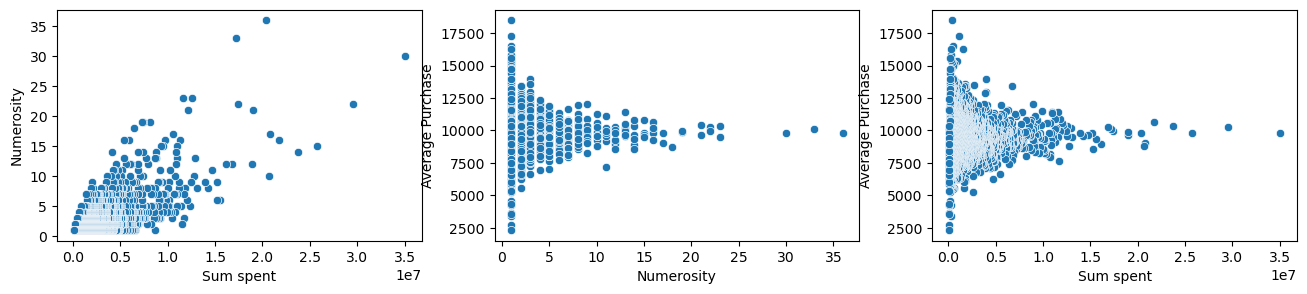

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(16,3))
sns.scatterplot(x='Sum spent', y='Numerosity', data=user_groups, ax=axs[0])
sns.scatterplot(x='Numerosity', y='Average Purchase', data=user_groups, ax=axs[1])
sns.scatterplot(x='Sum spent', y='Average Purchase', data=user_groups, ax=axs[2])
plt.show()